# Objectives

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [3]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
import time

In [5]:
df_archive_master= pd.read_csv('twitter_archive_master.csv')
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1659 non-null   int64  
 1   timestamp         1659 non-null   object 
 2   rating_out_of_10  1659 non-null   int64  
 3   name              1659 non-null   object 
 4   stage             1659 non-null   object 
 5   jpg_url           1659 non-null   object 
 6   img_num           1659 non-null   int64  
 7   p1                1659 non-null   object 
 8   p1_conf           1659 non-null   float64
 9   p1_dog            1659 non-null   bool   
 10  p2                1659 non-null   object 
 11  p2_conf           1659 non-null   float64
 12  p2_dog            1659 non-null   bool   
 13  p3                1659 non-null   object 
 14  p3_conf           1659 non-null   float64
 15  p3_dog            1659 non-null   bool   
 16  favorites         1659 non-null   int64  


## Visualization

In [6]:
df_archive_master.describe()

,tweet_id,rating_out_of_10,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers,user_favourites
count,1.659000e+03,1659.000000,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000,1659.00000,1.659000e+03,1659.000000
mean,7.392510e+17,10.810729,1.214587,0.605197,0.137453,6.142101e-02,8664.582278,2523.88909,8.769727e+06,145944.009042
std,6.793112e+16,1.803122,0.574701,0.266407,0.101495,5.195868e-02,12724.464295,4585.63332,6.201621e+01,0.094685
min,6.660209e+17,0.000000,1.000000,0.044333,0.000010,2.160900e-07,72.000000,11.00000,8.769712e+06,145944.000000
25%,6.774323e+17,10.000000,1.000000,0.378397,0.054823,1.600860e-02,1969.500000,564.50000,8.769716e+06,145944.000000
50%,7.139006e+17,11.000000,1.000000,0.606654,0.121377,4.991380e-02,4044.000000,1250.00000,8.769723e+06,145944.000000
75%,7.931581e+17,12.000000,1.000000,0.852629,0.199342,9.470910e-02,10688.000000,2856.50000,8.769726e+06,145944.000000
max,8.921774e+17,14.000000,4.000000,0.999984,0.467678,2.734190e-01,156782.000000,78122.00000,8.770381e+06,145945.000000


### 1- Pie Plot for popular dog breed  **EXCLUDING None**

In [8]:
df_archive_master[df_archive_master['stage']!='None']['stage'].value_counts()

pupper     173
doggo       53
puppo       22
floofer      8
Name: stage, dtype: int64

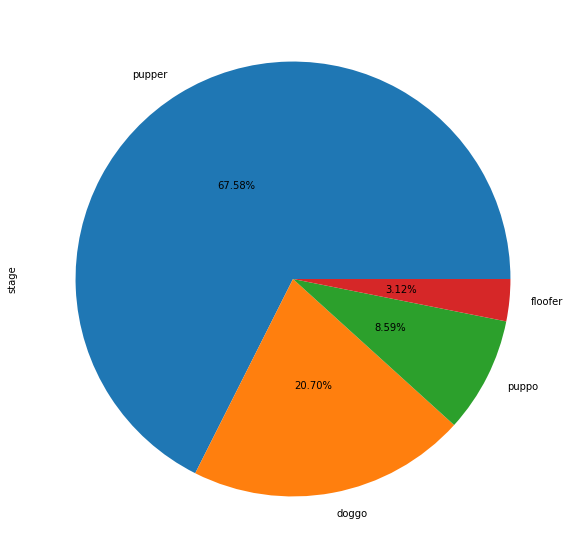

In [9]:
df_archive_master[df_archive_master['stage']!='None']['stage'].value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', pctdistance=.5, labeldistance=1.1)

## Insight 1:
Dogs in Pupper stage of dog life cycle get most tweets.

### 2: Scatter plot between favorites vs retweets

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

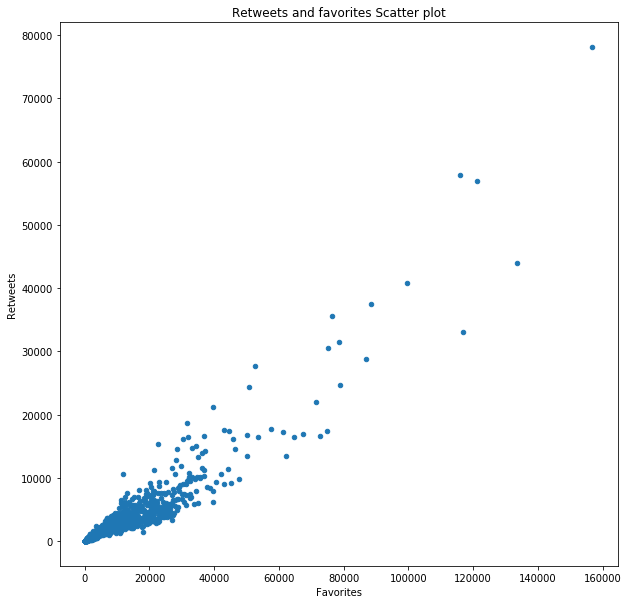

In [10]:
import matplotlib.pyplot as plt
df_archive_master.plot.scatter(x='favorites', y='retweets', figsize=(10,10))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [11]:
df_archive_master['favorites'].corr(df_archive_master['retweets'])

0.9310508713822508

## Insight 2:
There is a high correlation between favorites and retweets

In [12]:
df_breeds=df_archive_master.groupby('p1').count()[['tweet_id']]
df_breeds.reset_index(inplace=True)

In [13]:
# consider breeds with counts above 20
df_breeds[df_breeds['tweet_id']>20]

,p1,tweet_id
18,Chesapeake_Bay_retriever,23
19,Chihuahua,78
27,French_bulldog,25
40,Labrador_retriever,92
53,Pembroke,88
54,Pomeranian,38
59,Samoyed,39
103,chow,41
105,cocker_spaniel,27
123,golden_retriever,137


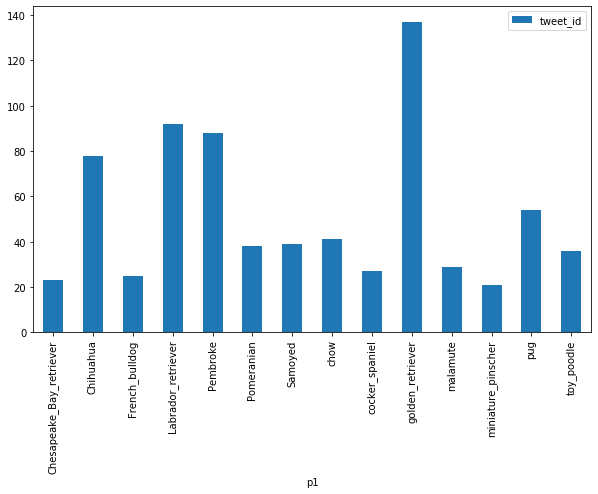

In [14]:
df_breeds[df_breeds['tweet_id']>20].plot.bar(x='p1',y='tweet_id',figsize=(10,6))

## Insight 3:
Golden retriever is the most populare dog based on predictions p1